In [1]:
#imports
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta

In [2]:
#raw data path
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
print(raw_data_path)

..\data\raw


In [3]:
#Train & Test files
train_users_file = os.path.join(raw_data_path, 'train_users_2.csv')
test_users_file = os.path.join(raw_data_path, 'test_users.csv')
train_users_df = pd.read_csv(train_users_file)
test_users_df = pd.read_csv(test_users_file)

In [4]:
train_users_df.info()
train_users_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
test_users_df.info()
test_users_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [ ]:
#(train_users_df['date_first_booking'] - train_users_df['date_account_created']).value_counts()
#(train_users_df['date_first_booking'] - train_users_df['date_account_created']).max()
#train_users_df[(train_users_df['date_first_booking'] - train_users_df['date_account_created'])== ((train_users_df['date_first_booking'] - train_users_df['date_account_created']).max())]

In [5]:
#Drop rows where 1st booking was made before account, 29 rows does not matter in 213451 rows
train_users_df['date_account_created'] = pd.to_datetime(train_users_df['date_account_created'])
train_users_df['date_account_created'] = pd.to_datetime(train_users_df['date_account_created'])
train_users_df['date_first_booking'] = pd.to_datetime(train_users_df['date_first_booking'])
test_users_df['timestamp_first_active'] = pd.to_datetime(test_users_df['timestamp_first_active'])
test_users_df['timestamp_first_active'] = pd.to_datetime(test_users_df['timestamp_first_active'])
len(train_users_df[train_users_df['date_first_booking']<train_users_df['date_account_created']])


29

In [6]:
train_users_df=train_users_df.drop(train_users_df[train_users_df['date_first_booking']<train_users_df['date_account_created']].index)

In [7]:
len(train_users_df[train_users_df['date_first_booking']<train_users_df['date_account_created']])

0

In [8]:
#Drop Target Column from 
country_destination = train_users_df['country_destination']
print(country_destination.describe())
print(country_destination.unique())
print(country_destination.value_counts())

count     213422
unique        12
top          NDF
freq      124543
Name: country_destination, dtype: object
['NDF' 'other' 'US' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']
NDF      124543
US        62355
other     10093
FR         5023
IT         2833
GB         2323
ES         2249
CA         1426
DE         1060
NL          762
AU          538
PT          217
Name: country_destination, dtype: int64


In [11]:
train_users_df = train_users_df.drop(columns=['country_destination'])
train_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213422 entries, 0 to 213450
Data columns (total 15 columns):
id                         213422 non-null object
date_account_created       213422 non-null datetime64[ns]
timestamp_first_active     213422 non-null int64
date_first_booking         88879 non-null datetime64[ns]
gender                     213422 non-null object
age                        125435 non-null float64
signup_method              213422 non-null object
signup_flow                213422 non-null int64
language                   213422 non-null object
affiliate_channel          213422 non-null object
affiliate_provider         213422 non-null object
first_affiliate_tracked    207358 non-null object
signup_app                 213422 non-null object
first_device_type          213422 non-null object
first_browser              213422 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(10)
memory usage: 26.1+ MB


In [12]:
# Concatenating train and test dfs to manipulate same columns all at one
data_df = pd.concat([train_users_df, test_users_df],ignore_index=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275518 entries, 0 to 275517
Data columns (total 15 columns):
id                         275518 non-null object
date_account_created       275518 non-null object
timestamp_first_active     275518 non-null object
date_first_booking         88879 non-null object
gender                     275518 non-null object
age                        158655 non-null float64
signup_method              275518 non-null object
signup_flow                275518 non-null int64
language                   275518 non-null object
affiliate_channel          275518 non-null object
affiliate_provider         275518 non-null object
first_affiliate_tracked    269434 non-null object
signup_app                 275518 non-null object
first_device_type          275518 non-null object
first_browser              275518 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 31.5+ MB


In [13]:
# Drop 1st booking date, its unknown for all test since its depending on the target column
data_df = data_df.drop(columns=['date_first_booking'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275518 entries, 0 to 275517
Data columns (total 14 columns):
id                         275518 non-null object
date_account_created       275518 non-null object
timestamp_first_active     275518 non-null object
gender                     275518 non-null object
age                        158655 non-null float64
signup_method              275518 non-null object
signup_flow                275518 non-null int64
language                   275518 non-null object
affiliate_channel          275518 non-null object
affiliate_provider         275518 non-null object
first_affiliate_tracked    269434 non-null object
signup_app                 275518 non-null object
first_device_type          275518 non-null object
first_browser              275518 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 29.4+ MB


In [14]:
# Age has many missing values, and many outliers affecting its mean/average
print(len(data_df[data_df['age']<10]))
print(len(data_df[data_df['age']>200]))
print("People above 80: ",len(data_df[data_df['age']>80]))
print(data_df['age'].median())
print(data_df['age'].mode()[0])
print(data_df['age'].mean())
print(data_df['age'].std())
print(data_df['age'].min())
print(data_df['age'].max())
print("------------------")
data_df.loc[data_df['age'] > 115, ['age']] = data_df['age'].median()
print(data_df['age'].median())
print(data_df['age'].mode()[0])
print(data_df['age'].mean())
print(data_df['age'].std())
print(data_df['age'].min())
print(data_df['age'].max())
print("------------------")
data_df.loc[data_df['age'] < 10, ['age']] = data_df['age'].median()
print(data_df['age'].median())
print(data_df['age'].mode()[0])
print(data_df['age'].mean())
print(data_df['age'].std())
print(data_df['age'].min())
print(data_df['age'].max())
print("------------------")
data_df.age.plot(kind='box')
#Outlier removed, all people ages range from 15-115 now

59
828
People above 80:  3188
33.0
30.0
47.14571869780341
142.64109728961049
1.0
2014.0
------------------
33.0
30.0
36.841694242223696
13.7954008195085
1.0
115.0
------------------
33.0
30.0
36.85235889193533
13.781311186453
15.0
115.0
------------------


In [15]:
#Fill in Age missing values
data_df[data_df['age'].isnull()]

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28 00:00:00,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
3,osr2jwljor,2010-01-01 00:00:00,20100101215619,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome
10,k6np330cm1,2010-01-05 00:00:00,20100105060859,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-
14,2dwbwkx056,2010-01-07 00:00:00,20100107215125,-unknown-,NaN,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-
16,cxlg85pg1r,2010-01-08 00:00:00,20100108015641,-unknown-,NaN,basic,0,en,seo,facebook,NaN,Web,Other/Unknown,-unknown-
18,qdubonn3uk,2010-01-10 00:00:00,20100110152120,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-
21,jha93x042q,2010-01-11 00:00:00,20100111224015,-unknown-,NaN,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
24,bjg0m5otl3,2010-01-12 00:00:00,20100112155420,-unknown-,NaN,basic,0,en,other,other,untracked,Web,Other/Unknown,-unknown-
36,7yzz3iv0ji,2010-01-15 00:00:00,20100115234132,-unknown-,NaN,basic,0,en,sem-non-brand,other,omg,Web,Windows Desktop,Firefox
41,69xzq1jxkq,2010-01-21 00:00:00,20100121183725,-unknown-,NaN,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-


In [16]:
len(data_df[data_df['age'].isnull()])

116863

In [17]:
data_df['age'].fillna(data_df['age'].mean(), inplace=True)

0
36.85235889193533
36.85235889193533
36.852358891935346
10.457836601169289
15.0
115.0
------------------


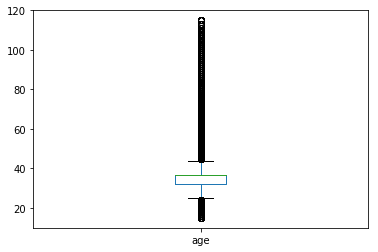

In [17]:
print(len(data_df[data_df['age'].isnull()]))
print(data_df['age'].median())
print(data_df['age'].mode()[0])
print(data_df['age'].mean())
print(data_df['age'].std())
print(data_df['age'].min())
print(data_df['age'].max())
print("------------------")
data_df.age.plot(kind='box')

In [18]:
#data_df['age'] = data_df['age'].replace(36.85235889193533, np.nan)
#print(len(data_df[data_df['age'].isnull()]))
#data_df['age'].fillna(data_df['age'].median(), inplace=True)
#print(len(data_df[data_df['age'].isnull()]))
#print(data_df['age'].median())
#print(data_df['age'].mode()[0])
#print(data_df['age'].mean())
#print(data_df['age'].std())
#print(data_df['age'].min())
#print(data_df['age'].max())
#print("------------------")
#data_df.age.plot(kind='box')

In [19]:
data_df.info()
#look for hidden missings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275518 entries, 0 to 275517
Data columns (total 14 columns):
id                         275518 non-null object
date_account_created       275518 non-null object
timestamp_first_active     275518 non-null object
gender                     275518 non-null object
age                        275518 non-null float64
signup_method              275518 non-null object
signup_flow                275518 non-null int64
language                   275518 non-null object
affiliate_channel          275518 non-null object
affiliate_provider         275518 non-null object
first_affiliate_tracked    269434 non-null object
signup_app                 275518 non-null object
first_device_type          275518 non-null object
first_browser              275518 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 29.4+ MB


In [20]:
data_df.first_affiliate_tracked.describe()

count        269434
unique            7
top       untracked
freq         143164
Name: first_affiliate_tracked, dtype: object

In [21]:
len(data_df.first_affiliate_tracked.isnull())

275518

In [22]:
data_df['first_affiliate_tracked'].fillna(str(data_df['first_affiliate_tracked'].mode()[0]), inplace=True)

In [23]:
print(len(data_df.first_affiliate_tracked.isnull()))
data_df.first_affiliate_tracked.describe()

275518


count        275518
unique            7
top       untracked
freq         149248
Name: first_affiliate_tracked, dtype: object

In [24]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275518 entries, 0 to 275517
Data columns (total 14 columns):
id                         275518 non-null object
date_account_created       275518 non-null object
timestamp_first_active     275518 non-null object
gender                     275518 non-null object
age                        275518 non-null float64
signup_method              275518 non-null object
signup_flow                275518 non-null int64
language                   275518 non-null object
affiliate_channel          275518 non-null object
affiliate_provider         275518 non-null object
first_affiliate_tracked    275518 non-null object
signup_app                 275518 non-null object
first_device_type          275518 non-null object
first_browser              275518 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 29.4+ MB


In [25]:
data_df['date_account_created'] = pd.to_datetime(data_df['date_account_created'])
data_df.dtypes
data_df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,36.852359,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
3,osr2jwljor,2010-01-01,20100101215619,-unknown-,36.852359,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome
4,lsw9q7uk0j,2010-01-02,20100102012558,FEMALE,46.000000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari


In [26]:
data_df.loc[:, ('season_accnt_crtd')]= ""
for i in range (275518):
    month = int(data_df['date_account_created'][i].strftime("%m"))
    if(month == 1 or month ==2 or month==12):
        data_df.loc[i, ('season_accnt_crtd')] = "winter"
    if (month == 3 or month == 4 or month == 5):
        data_df.loc[i, ('season_accnt_crtd')] = "spring"
    if (month == 6 or month == 7 or month == 8):
        data_df.loc[i, ('season_accnt_crtd')] = "summer"
    if (month == 9 or month == 11 or month == 10):
        data_df.loc[i, ('season_accnt_crtd')] = "automn"

In [29]:
data_df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,season_accnt_crtd
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,36.852359,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,summer
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,spring
2,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,winter
3,osr2jwljor,2010-01-01,20100101215619,-unknown-,36.852359,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,winter
4,lsw9q7uk0j,2010-01-02,20100102012558,FEMALE,46.000000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,winter


In [8]:
data_users_file = os.path.join(raw_data_path, 'data_users.csv')
data_df = pd.read_csv(data_users_file)
#data_df.to_csv(data_users_file)
#drop createddate now

In [9]:
data_df = data_df.drop(columns=['date_account_created'])
data_df.info()

ValueError: labels ['date_account_created'] not contained in axis

In [86]:
data_df = data_df.drop(columns=['timestamp_first_active'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275518 entries, 0 to 275517
Data columns (total 13 columns):
id                         275518 non-null object
gender                     275518 non-null object
age                        275518 non-null float64
signup_method              275518 non-null object
signup_flow                275518 non-null int64
language                   275518 non-null object
affiliate_channel          275518 non-null object
affiliate_provider         275518 non-null object
first_affiliate_tracked    275518 non-null object
signup_app                 275518 non-null object
first_device_type          275518 non-null object
first_browser              275518 non-null object
season_accnt_crtd          275518 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 27.3+ MB


In [87]:
#Encoding Gender
data_df['gender_known'] = -1
data_df.loc[data_df.gender == "MALE" , ['gender_known']] = 1
data_df.loc[data_df.gender == "FEMALE" , ['gender_known']] = 1
data_df.loc[data_df.gender == "OTHER" , ['gender_known']] = 0
data_df.loc[data_df.gender == "-unknown-" , ['gender_known']] = 0
#data_df.loc[(data_df.gender == "-unknown-" or data_df.gender == "OTHER") , ['gender_known']] = 1

In [88]:
data_df['gender_known'].value_counts()

1    145707
0    129811
Name: gender_known, dtype: int64

In [89]:
data_df.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,season_accnt_crtd,gender_known
0,gxn3p5htnn,-unknown-,36.852359,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,summer,0
1,820tgsjxq7,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,spring,1
2,bjjt8pjhuk,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,winter,1
3,osr2jwljor,-unknown-,36.852359,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,winter,0
4,lsw9q7uk0j,FEMALE,46.000000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,winter,1


In [90]:
data_df['is_male'] = 0
data_df.loc[data_df.gender == "MALE" , ['is_male']] = 1

In [91]:
data_df['is_male'].value_counts()

0    207320
1     68198
Name: is_male, dtype: int64

In [92]:
data_df = data_df.drop(columns=['gender'])

In [93]:
data_df.head()

,id,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,season_accnt_crtd,gender_known,is_male
0,gxn3p5htnn,36.852359,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,summer,0,0
1,820tgsjxq7,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,spring,1,1
2,bjjt8pjhuk,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,winter,1,0
3,osr2jwljor,36.852359,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,winter,0,0
4,lsw9q7uk0j,46.000000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,winter,1,0


In [64]:
#data_df = data_df.drop(columns=['signup_flow'])

In [94]:
data_df.head()

,id,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,season_accnt_crtd,gender_known,is_male
0,gxn3p5htnn,36.852359,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,summer,0,0
1,820tgsjxq7,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,spring,1,1
2,bjjt8pjhuk,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,winter,1,0
3,osr2jwljor,36.852359,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,winter,0,0
4,lsw9q7uk0j,46.000000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,winter,1,0


In [96]:
data_df.to_csv(data_users_file, index=False)

In [97]:
data_users_file = os.path.join(raw_data_path, 'data_users.csv')
sessions_file = os.path.join(raw_data_path, 'sessions.csv')
data_df = pd.read_csv(data_users_file)
sessions_df = pd.read_csv(sessions_file)

In [98]:
data_df.head()

,id,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,season_accnt_crtd,gender_known,is_male
0,gxn3p5htnn,36.852359,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,summer,0,0
1,820tgsjxq7,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,spring,1,1
2,bjjt8pjhuk,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,winter,1,0
3,osr2jwljor,36.852359,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,winter,0,0
4,lsw9q7uk0j,46.000000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,winter,1,0


In [99]:
sessions_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [129]:
sessions_file = os.path.join(raw_data_path, 'sessions.csv')
sessions_df = pd.read_csv(sessions_file)

In [130]:
sessions_df=sessions_df.drop(columns=['action_type', 'action_detail','secs_elapsed','device_type'])
#print(sessions_df.head())
s = sessions_df.groupby(['user_id', 'action']).count()
sl = sessions_df.groupby(['user_id'])

In [156]:
print(sl)
#s.describe()
#len(sl['00023iyk9l'])
sl.get_group('00023iyk9l').action.value_counts()['show']
sl.get_group('00023iyk9l')['action'].unique()

array(['index', 'dashboard', 'header_userpic', 'callback', nan, 'pending',
       'requested', 'travel_plans_current', 'show',
       'ajax_refresh_subtotal', 'similar_listings', 'confirm_email',
       'personalize', 'search_results'], dtype=object)

In [148]:
users_have_session = sessions_df.user_id.unique()
users_have_session

array(['d1mm9tcy42', 'yo8nz8bqcq', '4grx6yxeby', ..., 'fa6260ziny',
       '87k0fy4ugm', '9uqfg8txu3'], dtype=object)

#s_group = sessions_df.groupby(['user_id'])
#users_have_session = sessions_df.user_id.unique().tolist()
#users_have_session = [x for x in users_have_session if str(x) != 'nan']
#actions = sessions_df['action'].unique().tolist()
#processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
#s_group = sessions_df.groupby(['user_id'])
#users_have_session = sessions_df.user_id.unique().tolist()
#users_have_session = [x for x in users_have_session if str(x) != 'nan']
#actions = sessions_df['action'].unique().tolist()
#columns = ['id']+actions
#df_ = pd.DataFrame( columns=columns)
#df_.id = users_have_session
#df_.fillna(0, inplace=True)
#print(len(users_have_session))
####for i in range(len(users_have_session)):
    #user_actions = s_group.get_group(str(users_have_session[i])).action.unique().tolist()
  #  user_actions = [x for x in user_actions if str(x) != 'nan']
  ##  print(i)
    #print(user_actions)
   # for k in range(len(user_actions)):
        #print(str(user_actions[k]))
      #  action_count = s_group.get_group(users_have_session[i]).action.value_counts()[str(user_actions[k])]
       # df_.loc[df_['id']==users_have_session[i], [user_actions[k]]] = action_count
#users_actions_file = os.path.join(processed_data_path, 'users_actions.csv')
##df_.to_csv(users_actions_file, index=False)

In [5]:
data_users_file = os.path.join(raw_data_path, 'data_users.csv')
data_df = pd.read_csv(data_users_file)
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
users_actions_file = os.path.join(processed_data_path, 'users_actions.csv')
users_actions_df = pd.read_csv(users_actions_file)
users_actions_df.head()

,id,lookup,search_results,personalize,index,similar_listings,ajax_refresh_subtotal,show,header_userpic,ask_question,...,south-america,braintree_client_token,view,stpcv,set_minimum_payout_amount,support_phone_numbers,refund_guest_cancellation,accept_decline,deactivated,rest-of-world
0,d1mm9tcy42,23,12,25,11,9,8,28,1,1,...,0,0,0,0,0,0,0,0,0,0
1,yo8nz8bqcq,0,0,1,0,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4grx6yxeby,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,ncf87guaf0,14,31,10,2,28,32,15,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4rvqpxoh3h,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
len(data_df[data_df['gender_known']==-1])

0

In [8]:
list(users_actions_df)
len(users_actions_df[users_actions_df['search_results']==0])

89194

In [16]:
test_users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [17]:
len(train_users_df)

213451

In [18]:
data_df.loc[213422, 'id']

'5uwns89zht'

In [19]:
len(data_df)-len(data_df[data_df.id.isin(users_actions_df.id)])

140035

In [20]:
check_user_session=pd.merge(data_df,users_actions_df,on='id', how='left')
check_user_session.head()

,id,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,south-america,braintree_client_token,view,stpcv,set_minimum_payout_amount,support_phone_numbers,refund_guest_cancellation,accept_decline,deactivated,rest-of-world
0,gxn3p5htnn,36.852359,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bjjt8pjhuk,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,osr2jwljor,36.852359,basic,0,en,other,other,omg,Web,Mac Desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,lsw9q7uk0j,46.000000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
check_user_session.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275518 entries, 0 to 275517
Columns: 374 entries, id to rest-of-world
dtypes: float64(361), int64(3), object(10)
memory usage: 788.3+ MB


In [22]:
users_actions_df[users_actions_df['id']=='gxn3p5htnn']

,id,lookup,search_results,personalize,index,similar_listings,ajax_refresh_subtotal,show,header_userpic,ask_question,...,south-america,braintree_client_token,view,stpcv,set_minimum_payout_amount,support_phone_numbers,refund_guest_cancellation,accept_decline,deactivated,rest-of-world


In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275518 entries, 0 to 275517
Data columns (total 14 columns):
id                         275518 non-null object
age                        275518 non-null float64
signup_method              275518 non-null object
signup_flow                275518 non-null int64
language                   275518 non-null object
affiliate_channel          275518 non-null object
affiliate_provider         275518 non-null object
first_affiliate_tracked    275518 non-null object
signup_app                 275518 non-null object
first_device_type          275518 non-null object
first_browser              275518 non-null object
season_accnt_crtd          275518 non-null object
gender_known               275518 non-null int64
is_male                    275518 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 29.4+ MB


In [24]:
print(data_df.isna().any())
print((check_user_session.isnull().sum()).sum())

id                         False
age                        False
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked    False
signup_app                 False
first_device_type          False
first_browser              False
season_accnt_crtd          False
gender_known               False
is_male                    False
dtype: bool
50412600


In [26]:
check_user_session.fillna(0, inplace=True)

In [27]:
print((check_user_session.isnull().sum()).sum())

0


In [28]:
check_user_session_encoded = pd.get_dummies(check_user_session, columns={'signup_method', 'signup_flow','language','signup_app',
                                                                         'first_device_type','first_browser','season_accnt_crtd',
                                                                        'affiliate_channel','first_affiliate_tracked','affiliate_provider'})

In [29]:
check_user_session_encoded.head()

,id,age,gender_known,is_male,lookup,search_results,personalize,index,similar_listings,ajax_refresh_subtotal,...,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh
0,gxn3p5htnn,36.852359,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,38.000000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,bjjt8pjhuk,42.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,osr2jwljor,36.852359,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,lsw9q7uk0j,46.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
check_user_session_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275518 entries, 0 to 275517
Columns: 517 entries, id to language_zh
dtypes: float64(361), int64(2), object(1), uint8(153)
memory usage: 807.4+ MB


In [32]:
check_user_session_encoded.loc[213422, 'id']

'5uwns89zht'

In [34]:
processed_data_file = os.path.join(processed_data_path, 'all_users_processed_data.csv')
check_user_session_encoded.to_csv(processed_data_file, index=False)

In [10]:
factor = pd.factorize(country_destination)
factor

(array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 Index(['NDF', 'other', 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE',
        'AU'],
       dtype='object'))

In [18]:
factor[0]
#factor[1]

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
len(factor[0])

213422

In [25]:
factor[0][3]
mappings = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
mappings

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [26]:
processed_y = pd.DataFrame( columns=['country_destination'])
processed_y.country_destination = factor[0]
processed_y_mapping = pd.DataFrame( columns=['factor','country_destination'])
processed_y_mapping.factor = mappings
processed_y_mapping.country_destination = factor[1]

In [29]:
processed_target_file = os.path.join(processed_data_path, 'processed_train_target_data.csv')
processed_y.to_csv(processed_target_file, index=False)
target_mapping_file = os.path.join(processed_data_path, 'target_data_mapping.csv')
processed_y_mapping.to_csv(target_mapping_file, index=False)

In [28]:
np.array({0,1,2,3,4,5,6,7,8,9,10,11})

array({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}, dtype=object)

In [59]:
processed_data_file = os.path.join(processed_data_path, 'all_users_processed_data.csv')
processed_data_df = pd.read_csv(processed_data_file)

In [61]:
processed_data_df['session_known'] = 0

In [62]:
processed_data_df.head()

,id,age,gender_known,is_male,lookup,search_results,personalize,index,similar_listings,ajax_refresh_subtotal,...,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,session_known
0,gxn3p5htnn,36.852359,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,38.000000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,bjjt8pjhuk,42.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,osr2jwljor,36.852359,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,lsw9q7uk0j,46.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
users_actions_file = os.path.join(processed_data_path, 'users_actions.csv')
users_actions_df = pd.read_csv(users_actions_file)

In [64]:
processed_data_df.loc[processed_data_df['id'].isin(users_actions_df.id), 'session_known'] = 1

In [65]:
len(processed_data_df)-len(processed_data_df[processed_data_df['session_known']==1])

140035

In [66]:
processed_train_data = processed_data_df[0:213422]

In [67]:
len(processed_train_data)

213422

In [68]:
processed_train_data.tail()

,id,age,gender_known,is_male,lookup,search_results,personalize,index,similar_listings,ajax_refresh_subtotal,...,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,session_known
213417,zxodksqpep,32.000000,1,1,1.0,13.0,2.0,9.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
213418,mhewnxesx9,36.852359,0,0,8.0,19.0,27.0,31.0,0.0,28.0,...,0,0,0,0,0,0,0,0,0,1
213419,6o3arsjbb4,32.000000,0,0,0.0,0.0,2.0,0.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,1
213420,jh95kwisub,36.852359,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
213421,nw9fwlyb5f,36.852359,0,0,0.0,0.0,0.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
processed_test_data = processed_data_df[213422:]

In [70]:
len(processed_test_data)

62096

In [71]:
processed_test_data.head()

,id,age,gender_known,is_male,lookup,search_results,personalize,index,similar_listings,ajax_refresh_subtotal,...,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,session_known
213422,5uwns89zht,35.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
213423,jtl0dijy2j,36.852359,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
213424,xx0ulgorjt,36.852359,0,0,0.0,32.0,6.0,16.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
213425,6c6puo6ix0,36.852359,0,0,0.0,0.0,3.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
213426,czqhjk3yfe,36.852359,0,0,0.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
#processed_train_data=processed_train_data.drop(columns=['id'])
#processed_test_data=processed_test_data.drop(columns=['id'])

In [72]:
processed_train_data_file = os.path.join(processed_data_path, 'train_users.csv')
processed_train_data.to_csv(processed_train_data_file, index=False)
processed_test_data_file = os.path.join(processed_data_path, 'test_users.csv')
processed_test_data.to_csv(processed_test_data_file, index=False)